In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class BayesUpdate:

    def __init__(self, df):
        "Dataframe with a likelihood and prior column"
        assert set(df.columns) == {"prior", "likelihood"}
        self.df = df
        self.calculate_posterior()
        self.normalize_columns()
        self.categorical = not df.index.is_numeric()

    def normalize_columns(self):
        self.df = self.df / self.df.sum(axis=0)

    def calculate_posterior(self):
        posterior = self.df["prior"] * self.df["likelihood"]
        self.df["posterior"] = posterior / sum(posterior)

    def plot(self):
        fig, ax = plt.subplots(figsize=(15, 5), ncols=3, sharey=True)
        if self.categorical:
            self.df.plot.bar(ax=ax, subplots=True)
        else:
            self.df.plot.area(ax=ax, subplots=True)

# Linear Updates

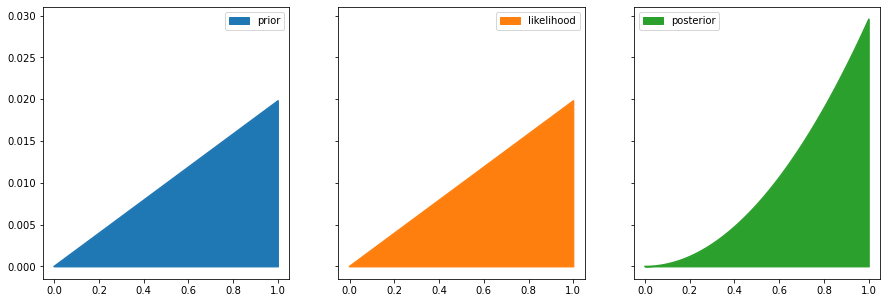

In [3]:
df = pd.DataFrame(
    {"prior": np.linspace(0, 1, 101), "likelihood": np.linspace(0, 1, 101)},
    index=np.linspace(0, 1, 101),
)
BayesUpdate(df).plot()

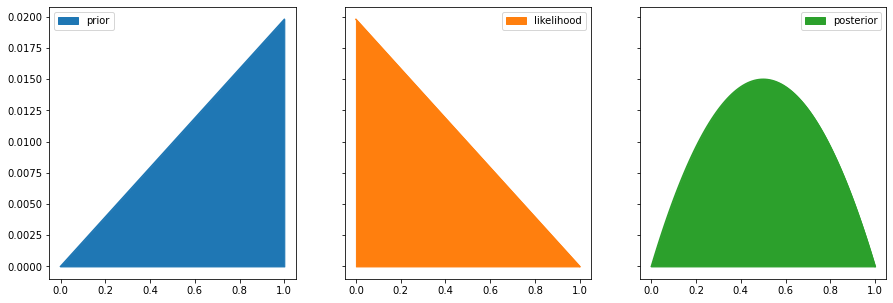

In [4]:
df = pd.DataFrame(
    {"prior": np.linspace(0, 1, 101), "likelihood": np.linspace(1, 0, 101)},
    index=np.linspace(0, 1, 101),
)
BayesUpdate(df).plot()

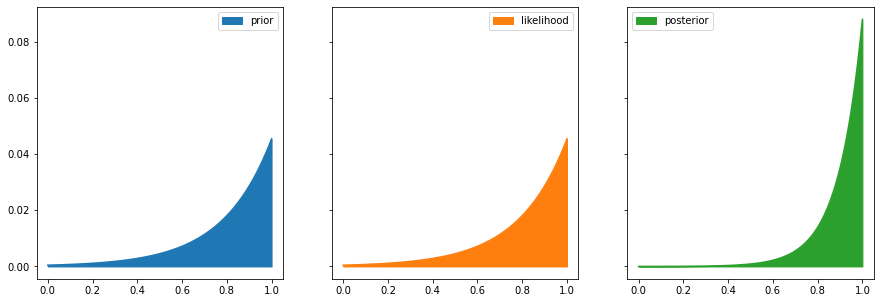

In [5]:
df = pd.DataFrame(
    {"prior": np.geomspace(0.1, 10, 101), "likelihood": np.geomspace(0.1, 10, 101)},
    index=np.linspace(0, 1, 101),
)
BayesUpdate(df).plot()

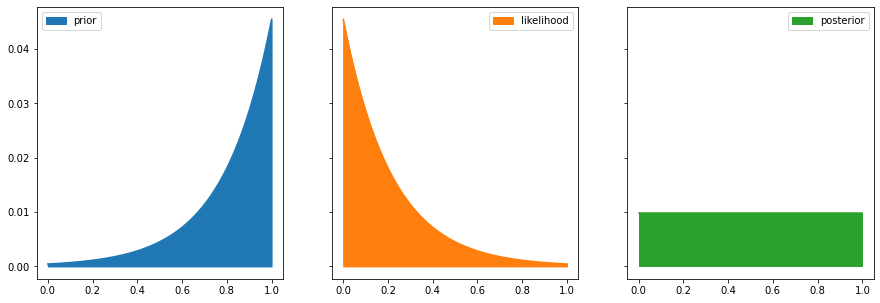

In [6]:
df = pd.DataFrame(
    {"prior": np.geomspace(0.1, 10, 101), "likelihood": np.geomspace(10, 0.1, 101)},
    index=np.linspace(0, 1, 101),
)
BayesUpdate(df).plot()

,prior,likelihood,posterior
Healthy,0.999,0.01,0.909836
Sick,0.001,0.99,0.090164


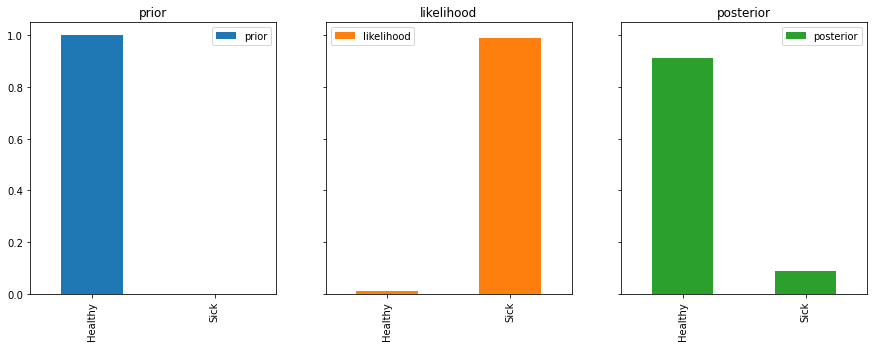

In [7]:
df = pd.DataFrame(
    {
        "prior": [999, 1],  # Disease that affects .1% of the population
        "likelihood": [1, 99],  # 99% accurate test
    },
    index=["Healthy", "Sick"],
)
z = BayesUpdate(df)
z.plot()
z.df